#	Simulation Tool For Road Safety Exploratory Analysis : Tutorial

##	Python 3.7
The scripts used in this tool use Python coding language. The version used is Python 3.7. 

## Requirement

A file requirements.txt is available at the root of the project. It is required to be installed in order to use the tool.
To do so, run the following line in your shell :


# Creating a simulation world
##	Alignments
An alignment is an object of type moving.Trajectory. For example, if you want to make an alignment whose width equals 3.7m, starting form point A(0, 0) to point B(0, 500):

In [3]:
from trafficintelligence import moving 
import network
import matplotlib.pyplot as plt

A = moving.Point(0,0)
B = moving.Point(0,500)
alignmentPoints = moving.Trajectory.fromPointList([A,B])

In the previous lines of codes we have generated the list of moving points which make up for the alignment.
An alignment has an unique id, and its width. They are attributed with the following lines:


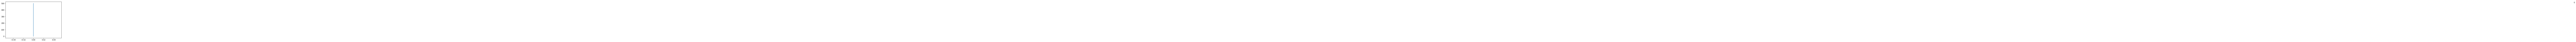

In [2]:
alignment = network.Alignment(idx=0,
                              width=3.7,
                              points=alignmentPoints)
alignment.plot()
plt.show()

## Distributions
A Distribution is an object of network.distribution type. It is useful when creating a generator of users. A distribution object represents a statistic distribution by its parameters (mean, standard deviation, and constant in the case of a degenerated distribution), cumulative frequency curve, name, and type of distribution. 

Thus, each variable subject to a random selection takes its parameters from this Distribution object.
For a user, it is necessary to instantiate the parameters tau, dn, headway, length, speed, and criticalGap.
Two types of theoretic distributions are available in the this version of the tool: exponential, and truncnorm, which is a trunced version of the normal distribution.
The user must enter minimum and maximum thresholds for the returned values, as parameters a and b. These parameters have no unit and are expressed as a multiple of the standard deviation (scale). 

It is also possible to generate a degenerated distribution by filling the field 'degeneratedConstant' with the desired value, type of distribution must be filled as 'degenerated'.

The following code illustrates the example of creation of distrutions of different type:

In [4]:
exampleOfTruncnormDistribution = network.Distribution(cdf=None,
                                            degeneratedConstant=None,
                                            distributionName='truncnorm', 
                                            distributionType='theoretic', 
                                            loc=8.333333,
                                            scale=1,
                                            a=-2,
                                            b=2)

exampleOfExponentialDistribution = network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='expon', 
                                                distributionType='theoretic', 
                                                loc=.5,
                                                scale=1)

exampleOfDegeneratedDistribution = network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName=None, 
                                                distributionType='degenerated', 
                                                loc=0,
                                                scale=0)

Code to generate a dictionnary of distributions for the user input generated later:

In [3]:
distributions = {'dn': network.Distribution(cdf=None,
                                            degeneratedConstant=None,
                                            distributionName='truncnorm', 
                                            distributionType='theoretic', 
                                            loc=8.333333,
                                            scale=1,
                                            a=-2,
                                            b=2),
                 'headway':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='expon', 
                                                distributionType='theoretic', 
                                                loc=.5,
                                                scale=1),
                 'length':network.Distribution(cdf=None,
                                               degeneratedConstant=None,
                                               distributionName='truncnorm',
                                               distributionType='theoretic',
                                               loc=7,
                                               scale=1,
                                               a=-2,
                                               b=2),
                 'speed':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='truncnorm', 
                                                distributionType='theoretic', 
                                                loc=14,
                                                scale=3,
                                                a=-1,
                                                b=1),
                 'tau':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='truncnorm', 
                                                distributionType='theoretic', 
                                                loc=2,
                                                scale=.5,
                                                a=-2,
                                                b=2), 
                 'criticalGap':network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName='truncnorm', 
                                                distributionType='degenerated', 
                                                loc=0,
                                                scale=0)

                }


## User demand
A user input is an object of type network.UserInput. It is an entry point on the network that generates users with characteristics that are drawn from random distributions (vehicle length, dn, t, inter-vehicle time, desired speed) that are specific to each entry point.

The following line explains how to create a userInput and also how to link it to the previous created alignment.

In [4]:
userInput = network.UserInput(idx=0,
                              alignmentIdx=alignment.idx,
                              distributions=distributions)

## Control devices
A control device is an object of type network.ControlDevice. This data structure makes it possible to take into account stop signs, yield signs, as well as traffic lights. A control device is necessarily linked to an alignment. 

The user has to specify the duration each driver is going to spend at a control device in the case of a stop sign. In this example, the value is set to 2 sec.

A stop sign is created and linked to the previously created alignment.
The control devices are by default attached to the very end of the alignment.

In [5]:
stopSign = network.StopSign(idx=0, alignmentIdx=0, stopDuration=2)

Two other types of control devices are available in this version of the simulation tool: yield signs and traffic lights. 
For now, yield signs can only function if implemented on only one of the entry alignments of an intersection.
Traffic lights work by pair, as a master traffic light and its slave.
In this version of the simulation tool, traffic lights are syncrhonized as follow:



Examples of creation of yield sign and traffic lights

In [6]:
yieldSign = network.YieldSign(idx=1, alignmentIdx=0)

slaveTrafficLight = network.TrafficLight(idx=3,
                                         alignmentIdx=0,
                                         redTime=20, amberTime=10, greenTime=10)
masterTrafficLight = network.TrafficLight(idx=2,
                                          alignmentIdx=0,
                                          redTime=20, amberTime=10, greenTime=10,
                                          slave=slaveTrafficLight)

## World
The 'world' is the data structure that brings together alignments, control devices, user generators, and users (the creation of these is explained later). It is necessary to add these attributes to the network.World object that have been created.



In [6]:
# création de l'objet World
world = network.World(alignments = [alignment],
                      controlDevices = [stopSign], 
                       userInputs = [userInput])

In [ ]:
import simulation
sim = simulation.Simulation.load('config.yml')   
sim.run(world)
world.plotUserTrajectories(sim.timeStep)

A World has been created. It is now possible to generate users that will move along the alignments. Afterwards, it is possible to save the created world and then load it, thanks to the 'save' and 'load' methods of the World class in the network module.

## Simulation parameters

The file 'config.yml' contains the configuration parameters needed in order to perform a simulation:

- duration: duration of simulation (s);
- minNCompletedUsers: minimum number of users that exited the network to consider the simulation as completed; 
- timeStep: time step of calculation;
- safetyDistance: minimum space users do not want to intrude even when they are stopped;
- verbose: boolean, to print the state of advacement during the simulation;
- seed: initial statem, to ensure replicability of simulation;
- increment: value of increment of seed for each replication of a given simulation;
- rep: number of replications;
- dbName: database name;
- computeInteractions: boolean, to compute interactions or not.


# Traffic simulation along a road

As a reminder: a portion of road is represented by a succession of alignments. In order to compute road traffic on an alignment, a userInput has to be defined and linked on an alignment. 

In [9]:
import network, simulation

world = network.World.load('simple-net.yml')
sim = simulation.Simulation.load('config.yml')   
sim.run(world)

# Output data

Completed interactions is a list of interactions whose at least one the vehicles involved exited the network. 
Other interactions are stored in world.interactions which is also a list of interactions.

Interactions will only be computed it the 'computeInteractions' boolean in the configuration file is filled as 'True'. The Analysis module of provides tool to save parameters of a simulation and the interactions and indicators generated as a database.  By default, only completed interactions are saved. It it possible to save all interactions by switching saveAllInteractions to 'True'.

Code to generate an Analysis object:

In [ ]:
import analysis as an
analysis = an.Analysis(idx=0, world=world, seed=sim.seed)

Code to save parameters of simulation and indicators for each interactions:

In [ ]:
analysis.saveParameters(sim.dbName)
analysis.saveIndicators(sim.dbName)

Interactions can also be serialized, via the saving tool of the Toolkit module:

In [ ]:
import toolkit
toolkit.saveYaml('interactions.yml', analysis.interactions)

# Saving Trajectories

It is possible to save trajectories for each user of the world. To do so, in the configuration file (config.yml), enter a name for the future database that will contain all the information.
Add the following line to your code: 

In [15]:
import analysis as an
analysis = an.Analysis(idx=0, world=world, seed=sim.seed)

network.createNewellMovingObjectsTable(sim.dbName)
world.saveObjects(sim.dbName, sim.seed, analysis.idx)
world.saveTrajectoriesToDB(sim.dbName, sim.seed, analysis.idx)